In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from pprint import pprint

import utils
import logging
utils.level = logging.WARN
# enabling debug logging causes lag.

import numpy as np
np.set_printoptions(
    suppress=True,
    linewidth=180
)

import matplotlib.pyplot as plt
# plt.ion()

pass

In [25]:
# from importlib import reload
import vehicles
import game as game_
import agents
# reload(vehicles)
# reload(game_)
# reload(agents)

game = game_.Game(
    max_vehicles=10,
    vehicle_provider=vehicles.JsonVehicleProvider("../subgame/python/solutions.json"),
    defender=agents.BasicDefenderAgent(),
    attacker=agents.BasicAttackerAgent()
)


In [26]:
dutils = []
autils = []
compromisePctPart = []
compromisePctOverall = []
num_rounds = 100
vcount = []
pcount = []
for i in range(num_rounds):
    dutils.append(game.defender_agent.utility)
    autils.append(game.attacker_agent.utility)
    compromisePctPart.append(len([v for v in game.vehicles if len(v.compromises) > 0])/(len(game.vehicles) if len(game.vehicles) > 0 else 1))
    bot = sum([len(v.achoice) for v in game.vehicles])
    if bot == 0: bot = 1
    compromisePctOverall.append(sum([len(v.compromises) for v in game.vehicles]) / bot)
    vcount.append(len(game.vehicles))
    pcount.append(len([v for v in game.vehicles if v.in_platoon]))
    game.step()

In [27]:
print(game.defender_agent.utility)
print(sum([len(v.compromises) for v in game.vehicles]), end="\t")
print(sum([len(v.known_compromises) for v in game.vehicles]), end="\t")
print(sum([len(v.compromises) for v in game.vehicles if v.in_platoon]), end="\t")

2482
16	0	16	

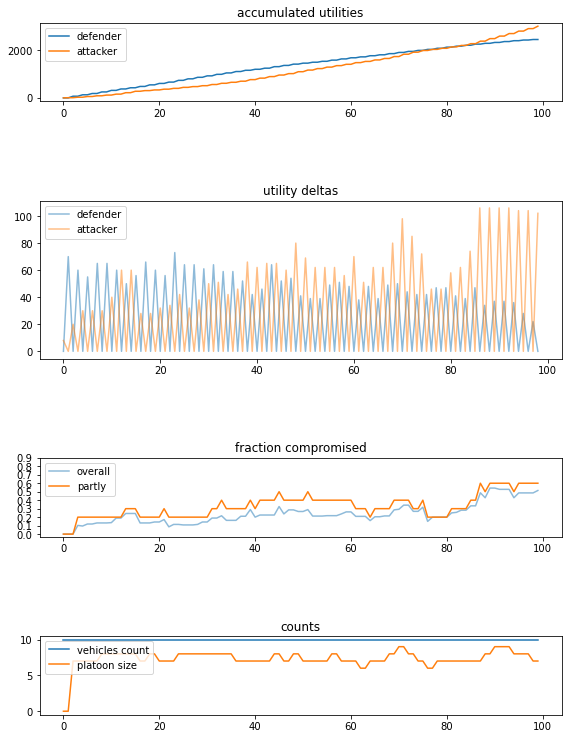

In [29]:

# fig, axs = plt.subplots(4, figsize=(16,9), gridspec_kw={'height_ratios': [1, 2, 1, 1]})
fig, axs = plt.subplots(4, figsize=(8,5), gridspec_kw={'height_ratios': [1, 2, 1, 1]})
i=0
axs[i].plot(dutils, label="defender")
axs[i].plot(autils, label="attacker")
axs[i].legend(loc="upper left")
axs[i].title.set_text("accumulated utilities")

i+=1
axs[i].plot(np.diff(dutils), label="defender", alpha=0.5)
axs[i].plot(np.diff(autils), label="attacker", alpha=0.5)
axs[i].legend(loc="upper left")
axs[i].title.set_text("utility deltas")

i+=1
axs[i].plot(compromisePctOverall, label="overall", alpha=0.5)
axs[i].plot(compromisePctPart, label="partly", alpha=1)
axs[i].set_yticks(np.arange(0,1,0.1))
axs[i].title.set_text("fraction compromised")
axs[i].legend(loc="upper left")

i+=1
axs[i].plot(vcount,label="vehicles count")
axs[i].plot(pcount,label="platoon size")
axs[i].legend(loc="upper left")
axs[i].title.set_text("counts")

plt.tight_layout()
plt.subplots_adjust(top=2)